In [71]:
# https://www.youtube.com/watch?v=tGpMb8R9D9M&t=994s

In [72]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import os
import matplotlib.pyplot as plt
# %matplotlib widget


In [73]:
def spike_detect(price, order=5):
    
    # for i in range(100, len(price)):
    peaks_idx = list(argrelextrema(price.Close.values[:i], np.greater, order=order)[0])
    troughs_idx = list(argrelextrema(price.Close.values[:i], np.less, order=order)[0])

    idx = peaks_idx + troughs_idx # not assuming the last candle is a spike
    idx.sort()

    current_idx = idx[-5:]
    current_pat = price.Close.values[current_idx]
    current_pat_H = price.High.values[current_idx]
    current_pat_L = price.Low.values[current_idx]

    start = min(current_idx)
    end = max(current_idx)
    
    return current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx

In [74]:
def is_gartley(ertiyab = 0.11):

    if len(current_idx) == 5:

        # Bulish Gartley

        XAu = current_pat_H[1] - current_pat_L[0]
        ABu = current_pat_L[2] - current_pat_H[1]
        BCu = current_pat_H[3] - current_pat_L[2]
        CDu = current_pat_L[4] - current_pat_H[3]

        ADu = current_pat_L[4] - current_pat_H[1]

        AB_range = np.array([0.618 - ertiyab, 0.618 + ertiyab ])*abs(XAu)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABu)
        CD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(BCu)

        AD_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAu)


        if (current_idx[0] in troughs_idx) and (current_idx[1] in peaks_idx) \
        and (current_idx[2] in troughs_idx) and (current_idx[3] in peaks_idx) and (current_idx[4] in troughs_idx):

            if XAu>0 and ABu<0 and BCu>0 and CDu<0 and ADu<0:

                if AB_range[0]<abs(ABu)<AB_range[1] and BC_range[0]<abs(BCu)<BC_range[1] and CD_range[0]<abs(CDu)<CD_range[1] \
                    and AD_range[0]<abs(ADu)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 11
                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan


            

                # Bearish Gartley

        XAd = current_pat_L[1] - current_pat_H[0]
        ABd = current_pat_H[2] - current_pat_L[1]
        BCd = current_pat_L[3] - current_pat_H[2]
        CDd = current_pat_H[4] - current_pat_L[3]
        ADd = current_pat_H[4] - current_pat_L[1]

        AB_range = np.array([0.618 - ertiyab, 0.618 + ertiyab ])*abs(XAd)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABd)
        CD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(BCd)

        AD_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAd)

        if (current_idx[0] in peaks_idx) and (current_idx[1] in troughs_idx) \
        and (current_idx[2] in peaks_idx) and (current_idx[3] in troughs_idx) and (current_idx[4] in peaks_idx):

            if XAd<0 and ABd>0 and BCd<0 and CDd>0 and ADd>0 :

                if AB_range[0]<abs(ABd)<AB_range[1] and BC_range[0]<abs(BCd)<BC_range[1] and CD_range[0]<abs(CDd)<CD_range[1] \
                    and AD_range[0]<abs(ADd)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -11

                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan







In [75]:
def is_butterfly(ertiyab = 0.11):

    if len(current_idx) == 5:

        # Bulish butterfly

        XAu = current_pat_H[1] - current_pat_L[0]
        ABu = current_pat_L[2] - current_pat_H[1]
        BCu = current_pat_H[3] - current_pat_L[2]
        CDu = current_pat_L[4] - current_pat_H[3]

        ADu = current_pat_L[4] - current_pat_H[1]

        AB_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAu)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABu)
        CD_range = np.array([1.618 - ertiyab, 2.618 + ertiyab ])*abs(BCu)

        AD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(XAu)


        if (current_idx[0] in troughs_idx) and (current_idx[1] in peaks_idx) \
        and (current_idx[2] in troughs_idx) and (current_idx[3] in peaks_idx) and (current_idx[4] in troughs_idx):

            if XAu>0 and ABu<0 and BCu>0 and CDu<0 and ADu<0 :

                if AB_range[0]<abs(ABu)<AB_range[1] and BC_range[0]<abs(BCu)<BC_range[1] and CD_range[0]<abs(CDu)<CD_range[1] \
                    and AD_range[0]<abs(ADu)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return 11
                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan


            

                # Bearish butterfly

        XAd = current_pat_L[1] - current_pat_H[0]
        ABd = current_pat_H[2] - current_pat_L[1]
        BCd = current_pat_L[3] - current_pat_H[2]
        CDd = current_pat_H[4] - current_pat_L[3]

        ADd = current_pat_H[4] - current_pat_L[1]

        AB_range = np.array([0.786 - ertiyab, 0.786 + ertiyab ])*abs(XAd)
        BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(ABd)
        CD_range = np.array([1.618 - ertiyab, 2.618 + ertiyab ])*abs(BCd)

        AD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(XAu)


        if (current_idx[0] in peaks_idx) and (current_idx[1] in troughs_idx) \
        and (current_idx[2] in peaks_idx) and (current_idx[3] in troughs_idx) and (current_idx[4] in peaks_idx):

            if XAd<0 and ABd>0 and BCd<0 and CDd>0 and ADd>0 :

                if AB_range[0]<abs(ABd)<AB_range[1] and BC_range[0]<abs(BCd)<BC_range[1] and CD_range[0]<abs(CDd)<CD_range[1] \
                    and AD_range[0]<abs(ADd)<AD_range[1]:

                    # avoid index getting out of range 
                    # a=33 # how many candle after the pattern to be shown
                    
                    # ValueError: x and y must have same first dimension, but have shapes
                    if (len(np.arange(start, i+33)) == len(price.values[start:i+33])):
                        
                        if (i+33 < 999):
                            # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -1
                        else:
                            # plt.plot(np.arange(start, 998), price.Close.values[start:998])
                            # plt.plot(current_idx, current_pat, c='r')
                            # plt.show()
                            return -11

                else :
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan







In [76]:
# Test one pair

# df = pd.read_csv(f"C:\\Users\Grant\Desktop\work_git\work\data\\4h\AAVEUSDT_4h.csv")
df = pd.read_csv(f"data\\4h\AAVEUSDT_4h.csv")


df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
df = df.set_index(df.Time)
price = df.copy()
ertiyab = 0.05

pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
# plt.ion()

for i in range(100, len(price)):

    current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=5)

    butt = is_butterfly(ertiyab)
    gart = is_gartley(ertiyab)



    harmonics = np.array([butt, gart])
    labels = ['butt', 'gart']

    if np.any(harmonics == 1) or np.any(harmonics == -1):
        for j in range(len(harmonics)):
            if harmonics[j] == 1 or harmonics[j] == -1:
                sense = 'bull' if harmonics[j] == 1 else 'bear'
                label =sense + labels[j] + ' found'

                if harmonics[j] == 1:
                    pips+= 100*(price.Close.values[end+1:end+16] - price.Close.values[end])
                
                # plt.clf
                # plt.bar(np.arange(1,16), pips)
                # plt.pause(0.05)

                # plt.title(label)
                # plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
                # plt.plot(current_idx, current_pat, c='r')
                # plt.show()





1INCHUSDT_4h.csv


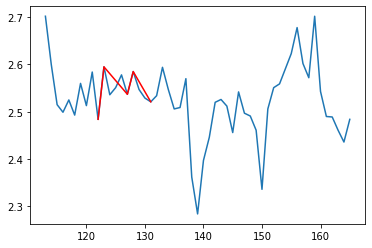

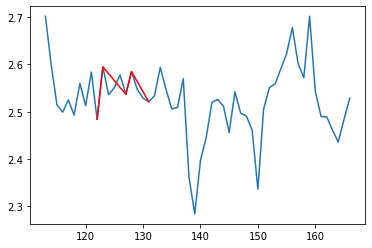

AAVEUSDT_4h.csv


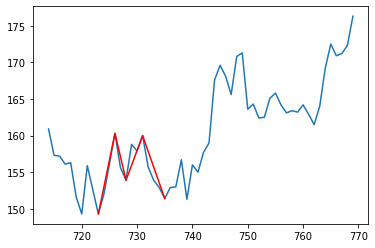

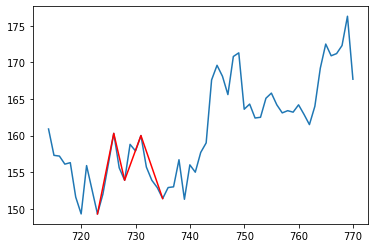

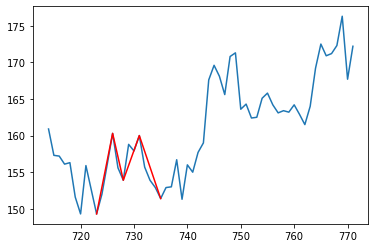

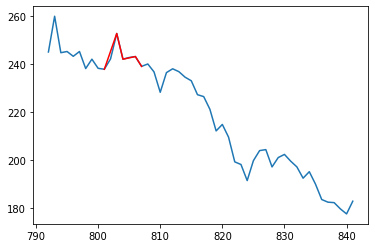

ACAUSDT_4h.csv
ACHUSDT_4h.csv


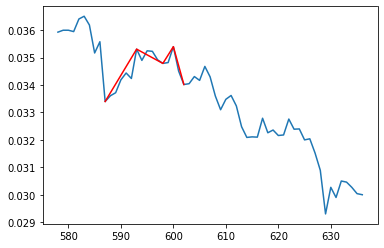

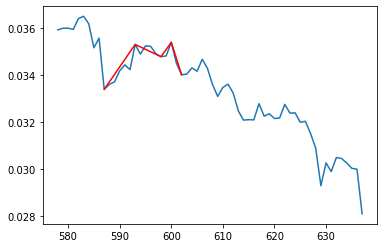

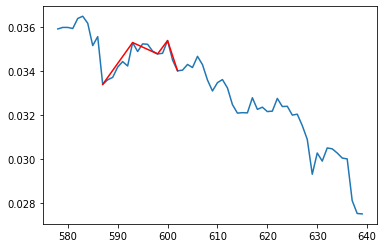

ACMUSDT_4h.csv
ADAUSDT_4h.csv
ADXUSDT_4h.csv
AGLDUSDT_4h.csv


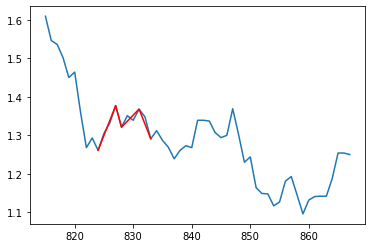

AIONUSDT_4h.csv
AKROUSDT_4h.csv
ALCXUSDT_4h.csv


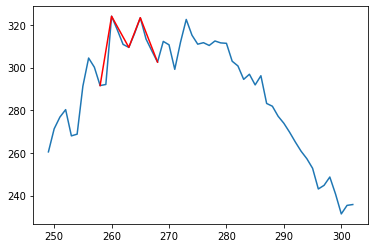

ALGOUSDT_4h.csv


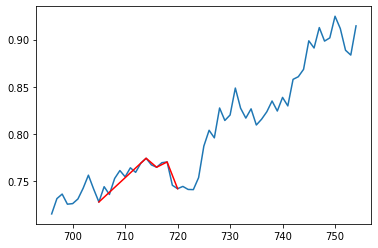

ALICEUSDT_4h.csv
ALPACAUSDT_4h.csv


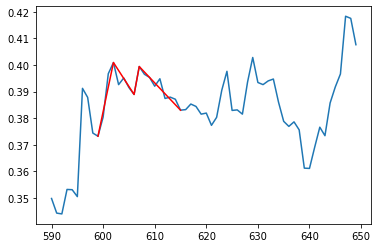

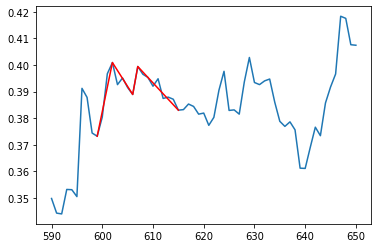

ALPHAUSDT_4h.csv


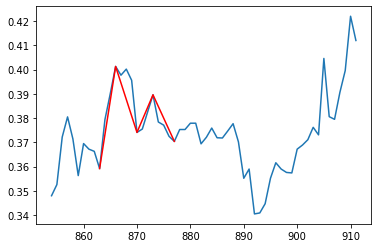

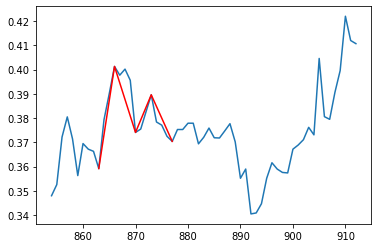

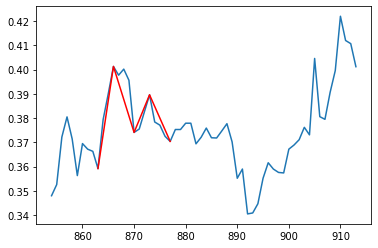

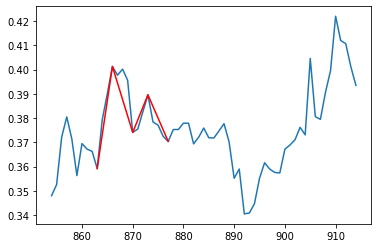

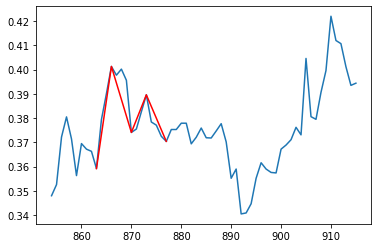

ALPINEUSDT_4h.csv


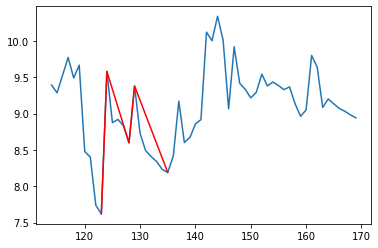

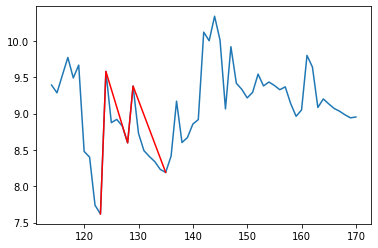

AMPUSDT_4h.csv


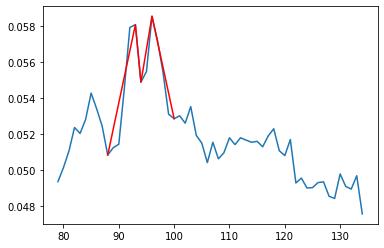

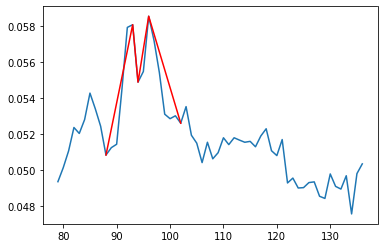

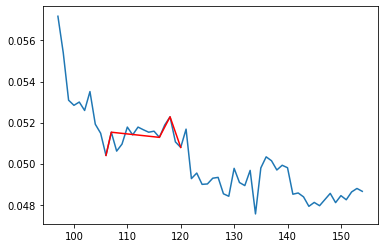

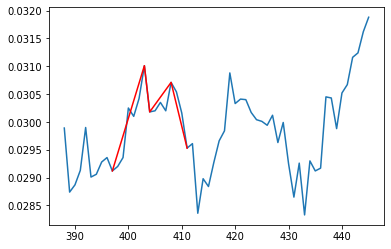

ANCUSDT_4h.csv
ANKRUSDT_4h.csv


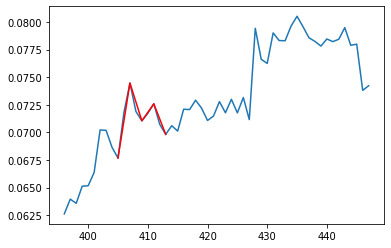

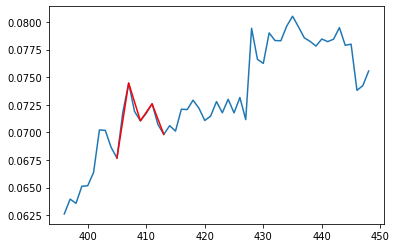

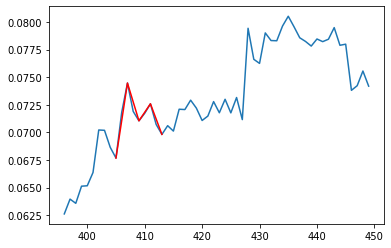

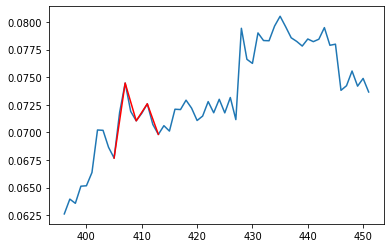

ANTUSDT_4h.csv
APEUSDT_4h.csv
API3USDT_4h.csv


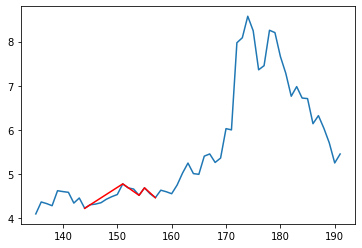

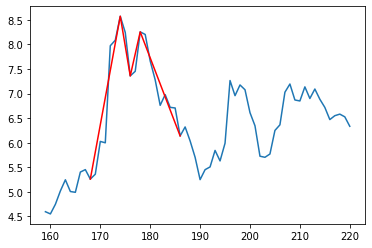

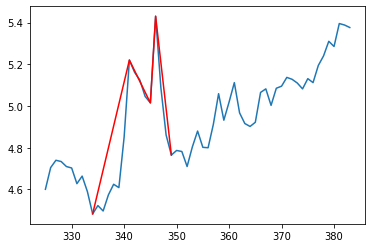

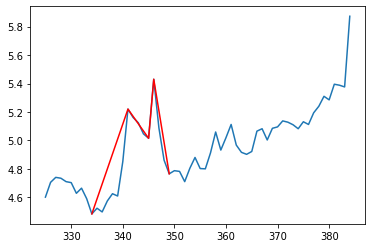

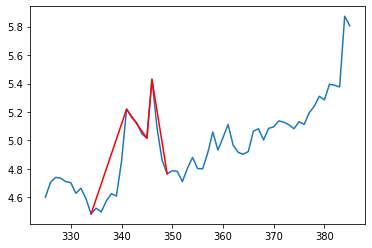

ARDRUSDT_4h.csv


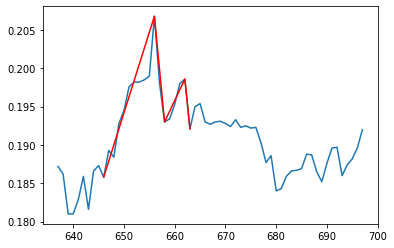

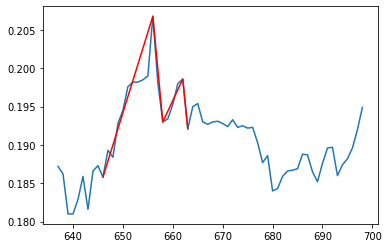

ARPAUSDT_4h.csv


KeyboardInterrupt: 

In [77]:
# test all pairs 

timeframe='4h'
   
outdir=f"{os.getcwd()}/data/{timeframe}"

for filename in os.listdir(outdir):
    # symbol = filename.replace(f\"_{timeframe}.csv\",\"\")
    df = pd.read_csv(f"{outdir}/{filename}")
    df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
    df = df.set_index(df.Time)

    print(filename)

    price = df.copy()
    ertiyab = 0.11

    for i in range(100, len(price)):

        current_idx, current_pat, current_pat_H, current_pat_L, start, end, peaks_idx, troughs_idx = spike_detect(price, order=2)
        # res = is_butterfly(ertiyab)
        res = is_gartley(ertiyab)

        if res == 1:
            plt.plot(np.arange(start-9, i+33), price.Close.values[start-9:i+33])
            plt.plot(current_idx, current_pat, c='r')
            plt.show()
